In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('./m_vectors.csv')
df

,date,m_count
0,1945-01-01 12:00,15
1,1945-01-01 13:00,15
2,1945-01-01 14:00,15
3,1945-01-01 15:00,16
4,1945-01-01 16:00,16
...,...,...
910734,2018-12-30 23:40,20
910735,2018-12-30 23:45,20
910736,2018-12-30 23:50,20
910737,2018-12-30 23:51,12


In [3]:
df.plot(x='date', y='m_count', style='.')

In [4]:
datefix = pd.to_datetime(df['date'], format='%Y%m%d %H:%M').astype(np.int64) / 10**9
df_unix_sec = pd.DataFrame({'date': datefix, 'm_count': df['m_count']})
df_unix_sec

,date,m_count
0,-7.888752e+08,15
1,-7.888716e+08,15
2,-7.888680e+08,15
3,-7.888644e+08,16
4,-7.888608e+08,16
...,...,...
910734,1.546213e+09,20
910735,1.546214e+09,20
910736,1.546214e+09,20
910737,1.546214e+09,12


In [5]:
#df_unix_sec.to_csv('./m_vectors_dtInt64.csv')

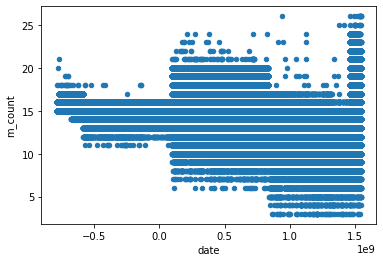

In [6]:
df_unix_sec.plot.scatter(x='date', y='m_count')

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=5, random_state=170).fit_predict(df_unix_sec)

In [9]:
import matplotlib.pyplot as plt

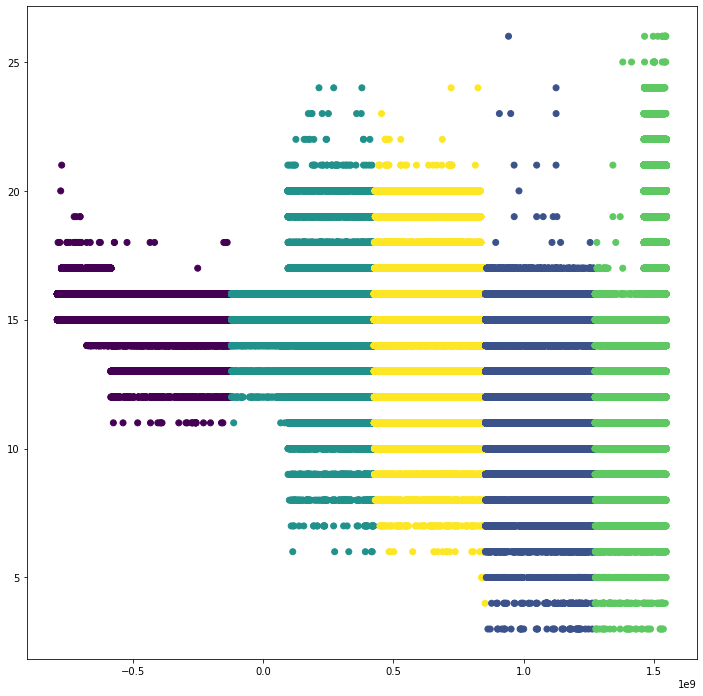

In [10]:
plt.figure(figsize=(12, 12))
plt.scatter(df_unix_sec['date'], df_unix_sec['m_count'], c=kmeans)